<a href="https://colab.research.google.com/github/NuraddinQJ/AiDojo-Bootcamp/blob/main/Week4_Day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision

In [17]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob
from sklearn import model_selection
from PIL import Image

In [18]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [19]:
x_train.shape , y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [20]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [21]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [22]:
#Normalize pixel value between 0 and 1
x_train = x_train/255
x_test = x_test/255

#convert th labels to on hot vector one hot shape for y

y_train = tf.one_hot(y_train, depth=10)
y_test = tf.one_hot(y_test, depth=10)

In [23]:
tf.argmax(y_train[0])

<tf.Tensor: shape=(), dtype=int64, numpy=6>

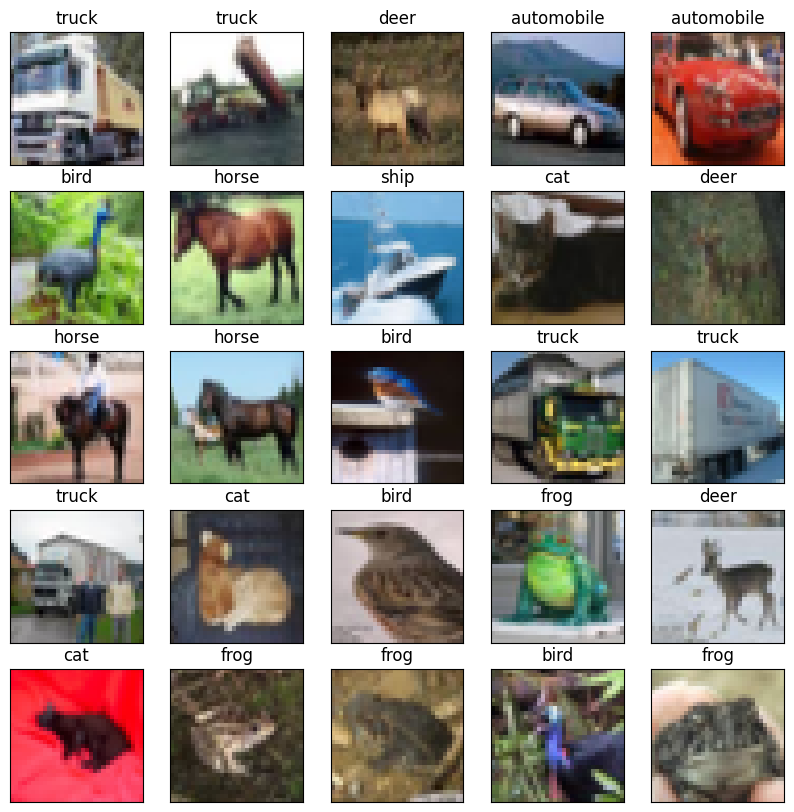

In [24]:
class_names = ['airplane','automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))

rows = 5
cols = 5
p_index = 1

for i in range(1, 26):

  plt.subplot(rows, cols, p_index)
  plt.imshow(x_train[i])
  plt.title(class_names[tf.argmax(y_train[i])])
  plt.xticks([])
  plt.yticks([])
  p_index +=1

plt.show()


In [30]:
from keras.layers.convolutional.conv2d_transpose import Conv2D
model = tf.keras.Sequential([
    tf.keras.layers.Input([32, 32, 3]),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, 'relu'),
    tf.keras.layers.Dense(32, 'relu'),
    tf.keras.layers.Dense(10, 'softmax')

])


In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 8, 8, 256)         2

In [ ]:
from matplotlib.rcsetup import validate_dpi
model.compile('Adam',
              tf.keras.losses.CategoricalCrossentropy(),
              ['acc'])
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=[x_test, y_test])

Epoch 1/5
1375/1563 [=========================>....] - ETA: 1:41 - loss: 1.6823 - acc: 0.3691